In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [213]:
df1 = pd.read_csv('Bank data.csv')
df1 = df1.dropna() 
df1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [214]:
#Studying column names
my_columns = list(df1.columns)
print(my_columns)

['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [215]:
df1.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [216]:
Mortgage_sum = df1['Mortgage'].sum()
Personal_Loan_sum = df1['Personal Loan'].sum()
Income_sum = df1['Income'].sum()
Creditcard_bills = df1['CreditCard'].sum()
#print(f'Loan issued is {Personal_Loan_sum}$ and Mortgage attained is {Mortgage_sum}$.')
#print(f'Income deposited by customers {Income_sum}$ and Mortgage attained is {Creditcard_bills}$.')

In [217]:
columns_to_drop = ['ID','Age','Experience', 'ZIP Code', 'Family', 'CCAvg', 'Education']
df1 = df1.drop(columns=columns_to_drop)
print(df1.shape)
df1.head()

(5000, 7)


,Income,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,49,0,0,1,0,0,0
1,34,0,0,1,0,0,0
2,11,0,0,0,0,0,0
3,100,0,0,0,0,0,0
4,45,0,0,0,0,0,1


In [218]:
BankCash_inflow = df1['Income'].sum()+df1['Securities Account'].sum()+df1['CD Account'].sum()
BankCash_outflow = df1['Mortgage'].sum()+df1['Online'].sum()+df1['CreditCard'].sum()
print(BankCash_inflow, BankCash_outflow)

369695 286948


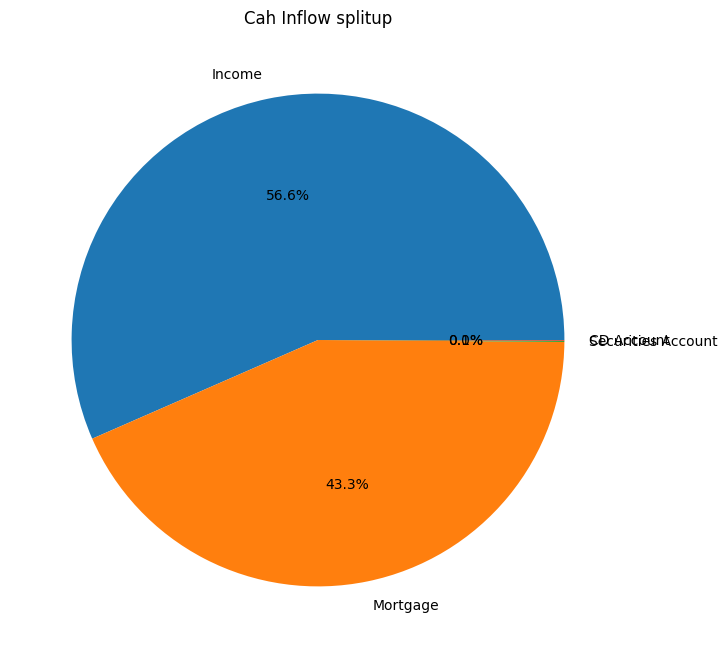

In [219]:
cash_inflow_sums = df1[['Income','Mortgage','Securities Account','CD Account']].sum()
labels = cash_inflow_sums.index
values = cash_inflow_sums.values
plt.figure(figsize=(8,8))
plt.pie(values, autopct='%1.1f%%', labels=titles)
plt.title("Cah Inflow splitup")
plt.show()

In [220]:
inflow_percentages = (cash_inflow_sums/cash_inflow_sums.sum())*100
df_inflow = pd.DataFrame({'Category':inflow_percentages.index,'Percentage values':inflow_percentages.values})
df_inflow

,Category,Percentage values
0,Income,56.558912
1,Mortgage,43.314745
2,Securities Account,0.080038
3,CD Account,0.046306


In [221]:
#Healthy loans mean Income+Securities account+Mortgage+CD Account>=Online+CreditCard+Personal Loan
df1['cash inflow'] = df1['Income']+df1['Securities Account']+df1['CD Account']
df1['cash outflow'] = df1['Mortgage']+df1['Online']+df1['CreditCard']
df1

,Income,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,cash inflow,cash outflow
0,49,0,0,1,0,0,0,50,0
1,34,0,0,1,0,0,0,35,0
2,11,0,0,0,0,0,0,11,0
3,100,0,0,0,0,0,0,100,0
4,45,0,0,0,0,0,1,45,1
...,...,...,...,...,...,...,...,...,...
4995,40,0,0,0,0,1,0,40,1
4996,15,85,0,0,0,1,0,15,86
4997,24,0,0,0,0,0,0,24,0
4998,49,0,0,0,0,1,0,49,1


In [222]:
# Filtering columns where cash inflow> cash outflow
df_filtered = df1[df1['cash inflow']>=df1['cash outflow']]
df_filtered

,Income,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,cash inflow,cash outflow
0,49,0,0,1,0,0,0,50,0
1,34,0,0,1,0,0,0,35,0
2,11,0,0,0,0,0,0,11,0
3,100,0,0,0,0,0,0,100,0
4,45,0,0,0,0,0,1,45,1
...,...,...,...,...,...,...,...,...,...
4994,75,0,0,0,0,1,0,75,1
4995,40,0,0,0,0,1,0,40,1
4997,24,0,0,0,0,0,0,24,0
4998,49,0,0,0,0,1,0,49,1


In [223]:
print(f'The bank has a total of {df1.shape[0]} customers out of which {df_filtered.shape[0]} customers have Cash deposits greater than withdrawl transactions.')
print(f'Percentage of healthy loans approved by the bank are {(df_filtered.shape[0]/df1.shape[0])*100:.2f}%.')

The bank has a total of 5000 customers out of which 3537 customers have Cash deposits greater than withdrawl transactions.
Percentage of healthy loans approved by the bank are 70.74%.
